# ***House price prediction***
- ***data: House price prediction, url: https://www.kaggle.com/datasets/shree1992/housedata***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [2]:
all_data = pd.read_csv('./data/data.csv')
output = pd.read_csv('./data/output.csv')
all_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
price = all_data['price']
features = all_data.drop(columns=['price'])

# ***EDA***
### 找到關鍵columns，檢查及處理缺失值，畫出關係圖觀察及證明相關性

In [36]:
all_columns = all_data.columns
print(len(all_columns))
all_columns

18


Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

### *Data description*
- waterfront: 前院有水
- renovated: 裝修
- condition (1~5): 越大越好
- view (0~4): 越大越好
- country: 全是美國，丟了

In [4]:
num_cols = features.describe().columns
cat_cols = all_data.drop(columns=features.describe().columns).columns
print(f'numerical: {num_cols}')
print(f'categorical: {cat_cols}')

numerical: Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')
categorical: Index(['date', 'price', 'street', 'city', 'statezip', 'country'], dtype='object')


In [46]:
all_data[num_cols].head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


In [47]:
all_data[cat_cols].head()

,date,price,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,9105 170th Ave NE,Redmond,WA 98052,USA


In [10]:
all_data['country'].unique()

array(['USA'], dtype=object)

### *Add a new features: house_age*
### which is the age of house, from the built year to 2024

In [15]:
all_data['house_age'] = 2024 - features['yr_built']

In [16]:
all_data['house_age'].head()

0     69
1    103
2     58
3     61
4     48
Name: house_age, dtype: int64

## Plotting 

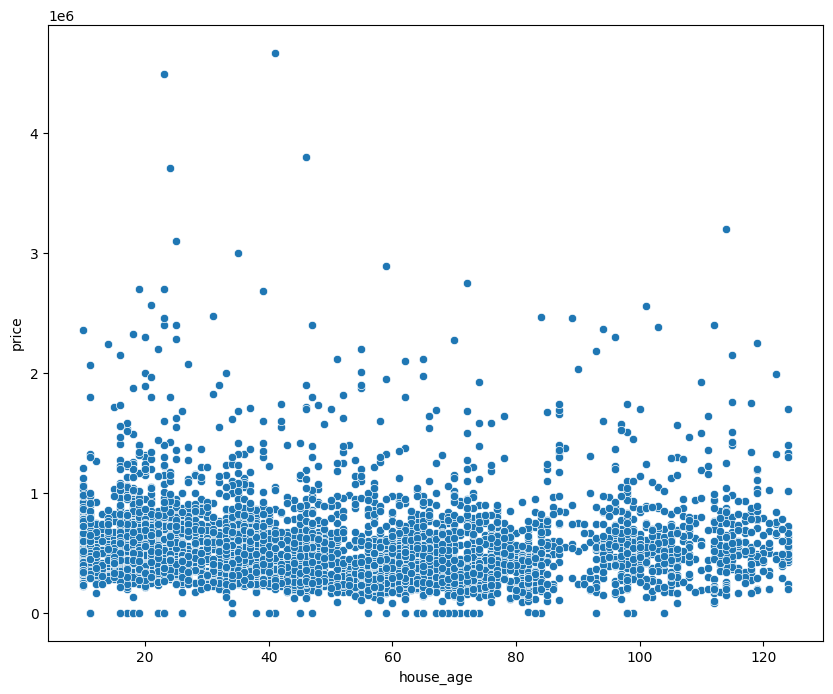

In [25]:

# * house age relation with price
price_under_7d = all_data[all_data['price'] <= 5*10**6]
fix, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x='house_age', y='price', data=price_under_7d)
plt.show()

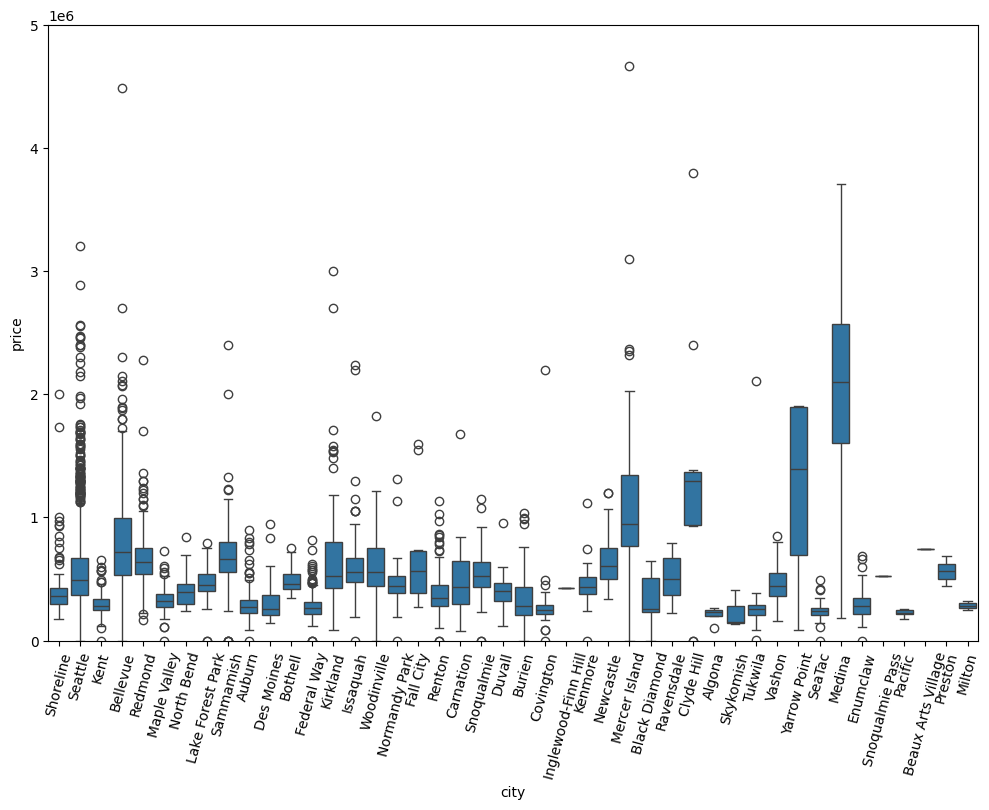

In [ ]:

# * City(region) relationship with price 
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x='city', y='price', data=all_data, ax=ax)
plt.xticks(rotation=75)
plt.ylim([0, 0.5*10**7])
plt.show()

# ***Start training***

In [34]:
X_train, X_test, y_train, y_test = train_test_split(data, price, random_state=13, train_size=0.8)